# Exploring the Prosper Loan Dataset
## by Gustaf Petersen

## Investigation Overview

The goal of this presentation is to showcase my findings from my investigation of Prosper Loan Data.
From the data, I wanted to investigate which factors influenced borrower rate, as it is central for both lenders in Prospers peer-to-peer service, the company Prosper, and the borrowers. The borrower rate has to reach an equilibrium where the rate is profitable for Prosper and Lenders while the cost is not to expensive for borrowers.
Thus the investigation is to determine what factors affect the borrower rate and its variation.

## Dataset Overview

The dataset had 80 columns and 113'937 rows.
The investigation first started with filtering out variables based on the variable definitions sheet.
The initial list of variables set out to explore where:

Credit Grade, Term, Borrower Rate, Estimated Loss, Estimated Return, Prosper Rating (numeric), Prosper Rating (Alpha), Prosper Score, Listing Category, Stated Monthly Income, Occupation, Listing Category, Occupation, EmploymentStatus, Employment Status Duration, Credit Score Range Lower, Credit Score Rang upper, Debt to Income Ratio, Income Range, Stated Monthly Income

But after some investigation into the quality of the data for the aforementioned variables, I ended up only keeping:
ListingCategory, Occupation, BorrowerRate, EstimatedLoss, EstimatedReturn, ProsperRating (Alpha), StatedMonthlyIncome, and DebtToIncomeRatio.

There was a little data wrangling such as changing listing category, which needed to first be changed from numerical values into the categories that we're accompanied and explained in the definitions sheet mentioned earlier.
Prosper Rating was ordered according to lowest to highest ranking: HR, E, D, C, B, A, AA.

Listing Category and Occupation were both concatenated to only include the top 5 most occurent categorical values.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# Load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')
prosper_alpha_list = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']
prosper_alpha_cat = pd.api.types.CategoricalDtype(ordered = True, categories=prosper_alpha_list)
df['ProsperRating (Alpha)'] = df['ProsperRating (Alpha)'].astype(prosper_alpha_cat)

# Selecting Comments
new_sel_col = [
                'ListingCategory (numeric)', 'Occupation', 'BorrowerRate',
                'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (Alpha)',
                'StatedMonthlyIncome', 'DebtToIncomeRatio'
              ]
df_clean = df[new_sel_col]


## Plot #1. Box- and Violinplot 

The first plot explores the relationship between ProsperRating and Borrower Rate, i.e the interest that a borrower has to pay and the rating the borrower receives. This is to determine the impact of Prosper's Rating.

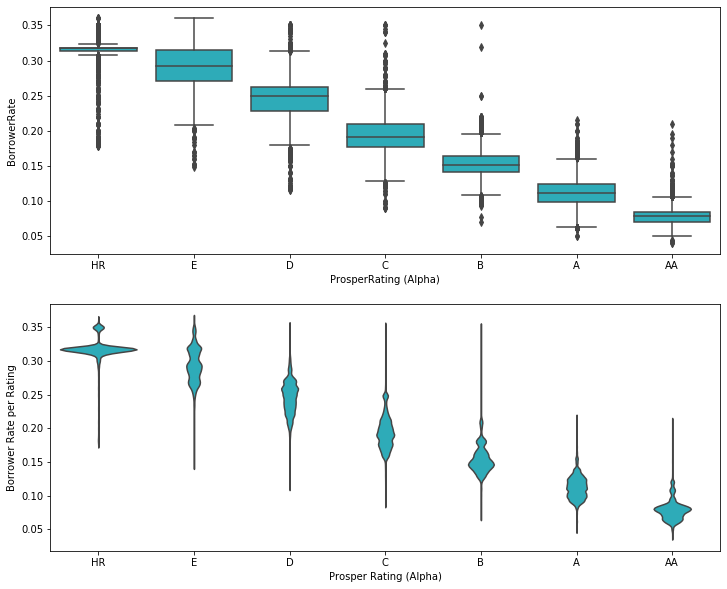

In [3]:
# Box plot and violinplot exploring the relationship between ProsperRating (Alpha) and BorrowerRate
base_color = sns.color_palette()[9]
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
sns.boxplot(data=df_clean, x='ProsperRating (Alpha)', y='BorrowerRate', color=base_color)
plt.subplot(2,1,2)
sns.violinplot(data=df_clean, x='ProsperRating (Alpha)', y='BorrowerRate', color=base_color, inner=None)
plt.xlabel('Prosper Rating (Alpha)')
plt.ylabel('Borrower Rate per Rating');

## Plot #2. Heatmap
The second plot shows the relationship between Estimated Loss and Borrower Rate in a 2d-histogram a.k.a Heatmap. Where the Borrower Rate increases as the Estimated Loss increases.

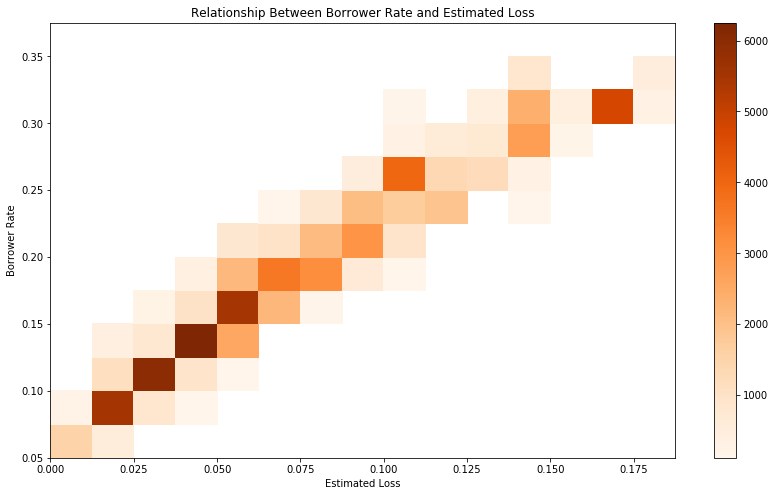

In [4]:
# Heatmap comparing the relationship between BorrowerRate and Estimated Loss
plt.figure(figsize=(14,8))
bins_x = np.arange(0,0.175+0.025,0.0125)
bins_y = np.arange(0.05,0.35+0.05,0.025)
plt.hist2d(data=df_clean, x='EstimatedLoss', y='BorrowerRate', bins= [bins_x, bins_y], cmap='Oranges', cmin=100)
plt.xlabel('Estimated Loss')
plt.ylabel('Borrower Rate')
plt.colorbar()
plt.title('Relationship Between Borrower Rate and Estimated Loss');

## Plot #3. Heatmap no. 2
The second heatmap displays the relationship between Borrower Rate and Estimated Return.
In this instance, we can see that as the Estimated Return increases so does the Borrower Rate, which might sound strange at first, however considering that increasing interest rates equals a higher cost, thus more margin for the lenders and Prosper. However, the relationship does not seem to be as strongly correlated as Estimated Loss.

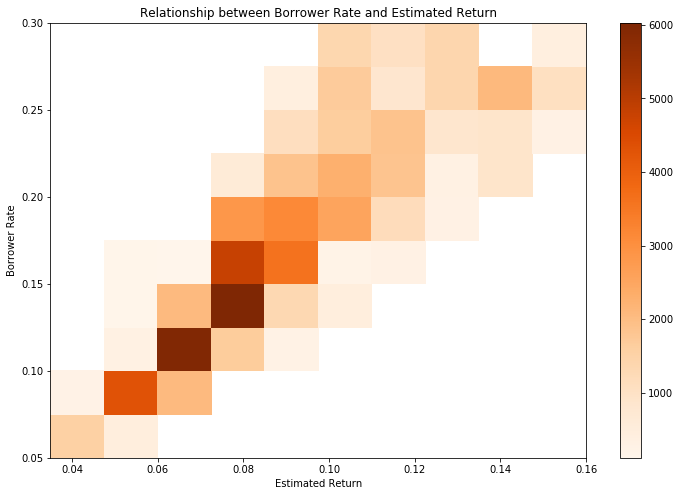

In [5]:
# Heatmap comparing the relationship between BorrowerRate and Estimated Return
plt.figure(figsize=(12,8))
bins_x = np.arange(0.035, 0.16+0.0125, 0.0125)
bins_y = np.arange(0.05, 0.3+0.025, 0.025)
plt.hist2d(data=df_clean, x='EstimatedReturn', y='BorrowerRate', bins= [bins_x, bins_y], cmap='Oranges', cmin=100)
plt.colorbar()
plt.xlabel('Estimated Return')
plt.ylabel('Borrower Rate')
plt.title('Relationship between Borrower Rate and Estimated Return');

## Plot #4. Faceted Scatterplot
Below are seven scatterplots, showing the relationship between Estimated Loss and Borrower Rate, separated by the Categorical variable Prosper Ratings from HR-AA. It is very clear that the relationship we could distinguish earlier is disrupted by the rating, which led me to believe that the relationship loss and borrower rate is more or less the relationship between the loss and the prosper rating that comes with it, meaning that I believe that the prosper rating is what is affected or related with the loss, which in turn may lead to an increase or decrease in interest rate.


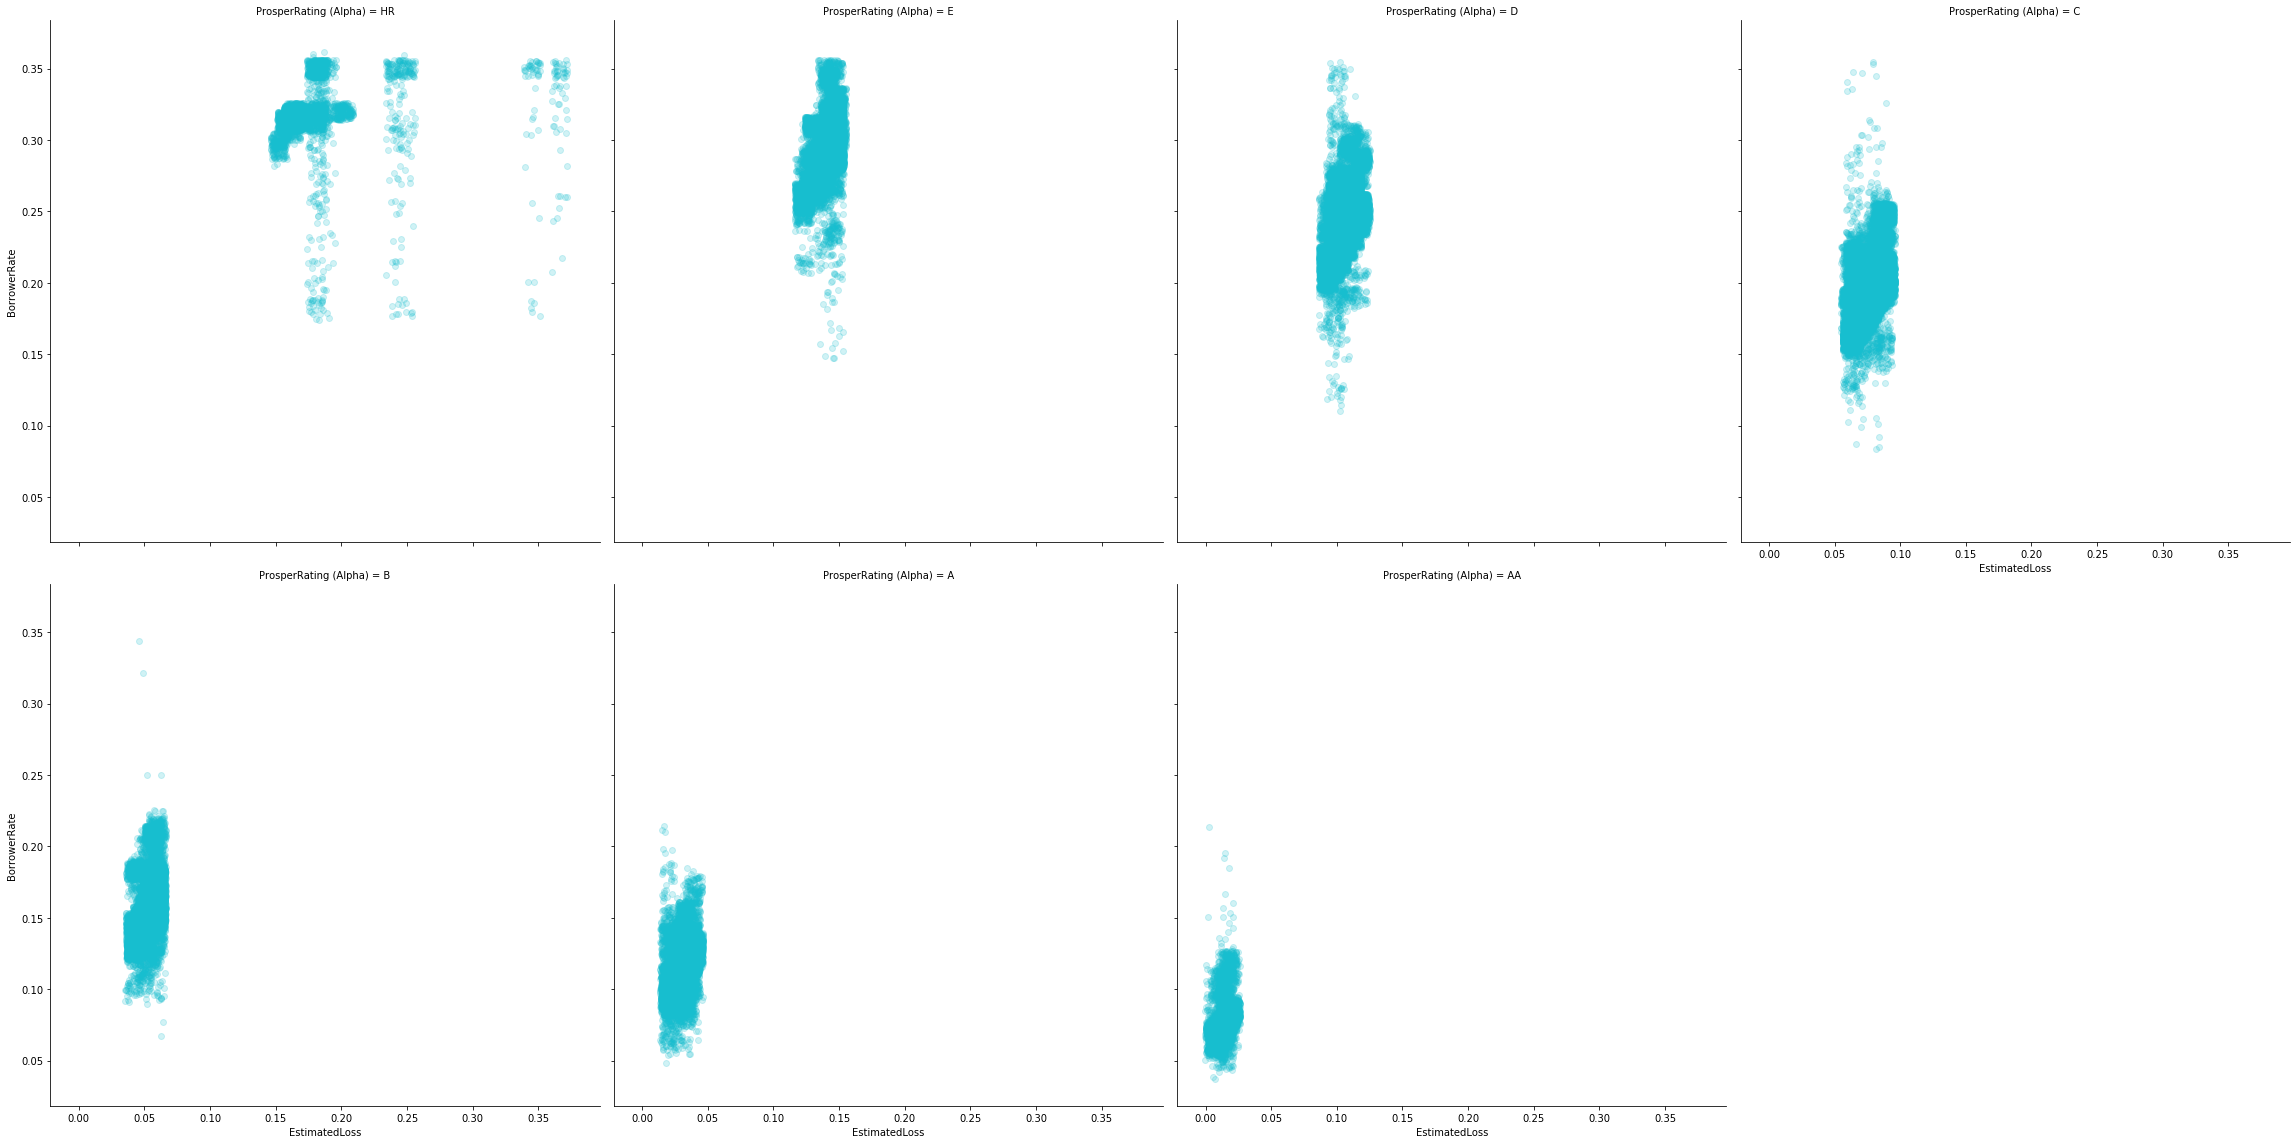

In [6]:
# FacetGrid Plots to examine the relatinship between Borrower Rate, Estimated Return and Prosper Rating
g = sns.FacetGrid(data = df_clean, col='ProsperRating (Alpha)', size=8, col_wrap = 4, margin_titles=True)
g.map(sns.regplot, 'EstimatedLoss', 'BorrowerRate', y_jitter=0.00625, x_jitter=0.00625, fit_reg=False, scatter_kws = {'alpha': 1/5}, color=base_color);


## Plot # 5. Correlational Heatmap
To finish things up, I created a heatmap to show the pearson Coefficient for the Quantitative variables we've explored previously, Borrower Rate, Estimated Return, Estimated Loss, Debt to Income Ratio, Stated Monthly Income.
The interesting part is the fact the the Borrower rate has like we previously mentioned it's strongest correlation with Estimated Loss, and Estimated Reward comes second.

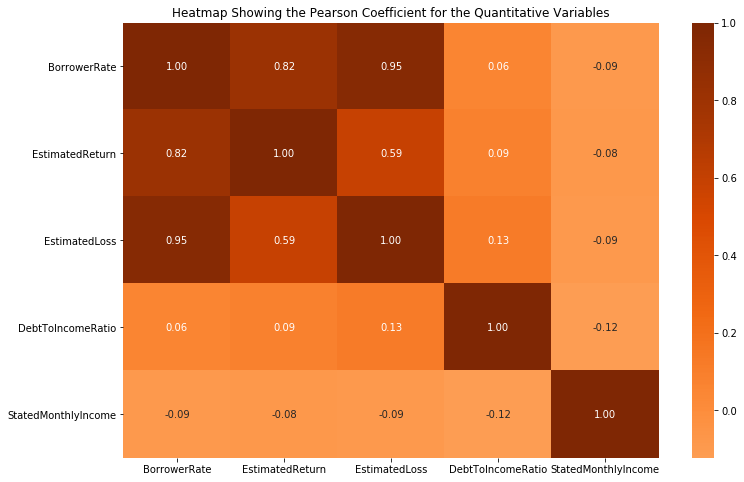

In [8]:
# Correlational Matrices between Borrower Rate, Estimated Return and Stated Monthly Income
plt.figure(figsize=(12,8))
plt.title('Heatmap Showing the Pearson Coefficient for the Quantitative Variables')
sns.heatmap(df_clean[['BorrowerRate', 'EstimatedReturn', 'EstimatedLoss', 'DebtToIncomeRatio','StatedMonthlyIncome']].corr(), annot=True, fmt='.2f', cmap='Oranges', center=0);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert slide_deck_explanatory_analysis.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

jupyter nbconvert slide_deck_explanatory_analysis.ipynb --to slides --post serve --template output_toggle


$ jupyter trust slide_deck_explanatory_analysis.ipynb